### Import Libraries

In [14]:
import pandas as pd          # data analysis library for handling structured data
import numpy as np           # mathematical library for working with numerical data
# import pandas_profiling
import time 
import math, copy

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
# plt.style.use('./deeplearning.mplstyle')
# from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients 

# Machine Learning 



# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [15]:
smart_home = pd.read_csv(r"C:\Users\Cornel\Documents\5. Projects\Smart Home\Smart Home Dataset\Smart Home Dataset with weather Information\HomeC.csv", low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Cornel\\Documents\\5. Projects\\Smart Home\\Smart Home Dataset\\Smart Home Dataset with weather Information\\HomeC.csv'

In [ ]:
smart_home.head(4)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
def replace_non_numeric(df: pd.DataFrame, columns):
    """
    Replaces non-numeric values in the specified columns of a Pandas dataframe with NaN.

    Parameters:
        df (pd.DataFrame): The dataframe to process.
        columns (list): A list of column names to replace non-numeric values in.

    Returns:
        pd.DataFrame: The updated dataframe with non-numeric values replaced by NaN.
    """
    for col in columns:
        if df[col].dtype == 'object':
            df.dropna(subset = col, inplace= True)
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

smart_home = replace_non_numeric(smart_home, columns= ['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'])

### Scikit-Learn

In [ ]:
#Import Built-in datasets. 
from sklearn.datasets import load_boston #Sklearn built-in dataset (load_boston, load_breast_cancer etc.)
X, y = load_boston (return_X_y= True)

#Sklearn Models
#from sklearn."sub-module" import "model"
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

    #steps  
    1. create your model object
        mod = KNeighborsRegressor() 
    2. Learn from your Data
        mod.fit(X, y)   
    3. Predict
        pred = mod.predict(X) 
    
    #Or (you may need to perform feature scaaling on your model in order to achieve better results) 
from sklearn.preprocessing import StandardScaler #this model can perform scaling
from sklearn.pipeline import Pipeline #pipeline object - allows you to chain processing steps after each other
    4. Pipeline
        pipe = Pipeline( [                              #it needs a list of tuples, and its a pair of a name and a step
            ("scale", StandardScaler()),
            ("model", KNeighborsRegressor()) 
            ]) 
    5. then learn from the Data
        pipe.fit(X, y)
    6. Predict
        pred = pipe.predict(X)

In [ ]:
#Scikit-Learn Sub-modules

# Scikit-Learn library is organized into several sub-modules, each of which contains a set of related functions and classes. 
# Here are the main sub-modules in scikit-learn:

# sklearn.datasets: This sub-module provides a set of standard datasets for machine learning, including iris, 
#     digits, and breast cancer.

# sklearn.model_selection: This sub-module contains functions for model selection, such as splitting data into 
#     training and test sets, cross-validation, and grid search.

# sklearn.preprocessing: This sub-module provides functions for preprocessing data, such as scaling, normalization, 
#     and encoding categorical variables.

# sklearn.feature_extraction: This sub-module contains functions for feature extraction from raw data, 
#     such as text data, including Bag of Words, CountVectorizer, and TfidfVectorizer.

# sklearn.metrics: This sub-module provides functions for evaluating the performance of machine learning models, 
#     such as accuracy, precision, recall, and F1 score.

# sklearn.pipeline: This sub-module provides tools for building machine learning pipelines, 
#     which allows you to chain together multiple steps, such as feature extraction, preprocessing, and model selection.

# sklearn.decomposition: This sub-module provides classes for matrix factorization and decomposition, 
#     such as Principal Component Analysis (PCA), Non-negative Matrix Factorization (NMF), 
#     and Latent Dirichlet Allocation (LDA).

# sklearn.discriminant_analysis: This sub-module provides classes for linear and quadratic discriminant analysis, 
#     which are used for supervised classification tasks.

# sklearn.covariance: This sub-module provides classes for covariance estimation, such as Empirical Covariance and 
#     Shrunk Covariance.

# sklearn.exceptions: This sub-module contains custom exceptions raised by scikit-learn, such as NotFittedError and 
#     ConvergenceWarning.


#Models: 


# sklearn.linear_model: This sub-module contains classes for linear models, such as linear regression, 
#     logistic regression, and ridge regression.

# sklearn.tree: This sub-module provides classes for decision trees, such as DecisionTreeClassifier and 
#     DecisionTreeRegressor.

# sklearn.ensemble: This sub-module contains classes for ensemble models, such as random forests, AdaBoost, 
#     and Gradient Boosting.

# sklearn.cluster: This sub-module provides classes for clustering, such as KMeans and Hierarchical Clustering.

# sklearn.neural_network: This sub-module contains classes for neural networks, such as Multi-Layer Perceptron (MLP) 
#     and Convolutional Neural Networks (CNNs).

# sklearn.svm: This sub-module contains classes for Support Vector Machines (SVMs), such as SVM classifier and regression.

# sklearn.manifold: This sub-module provides classes for manifold learning, such as t-SNE and Isomap.

# sklearn.naive_bayes: This sub-module provides classes for Naive Bayes models, such as Gaussian Naive Bayes and 
#     Multinomial Naive Bayes.

# sklearn.neighbors: This sub-module provides classes for k-Nearest Neighbors (k-NN) models, 
#     such as KNeighborsClassifier and KNeighborsRegressor.


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_features = iris_data.data 
iris_target = iris_data.target

# Convert the data to a DataFrame
df = pd.DataFrame(iris_features, columns=iris_data.feature_names)

# Add the target variable to the DataFrame
df['target'] = iris_target 

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# iris_data.DESCR
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Linear Regression and Multiple Linear Regression

> Vectorization

In [ ]:
# Vectorization is a technique used in machine learning and other computational tasks to speed up computations 
# by performing them on arrays of data instead of iterating over each individual element. 
# NumPy is a popular Python library for numerical computations and it provides many functions and methods for vectorization.

In [ ]:
#to compute the Multiple Linear regression values
# f(x) = W.X + b
# W = [w1, w2, w3, .... wn]     #a row vector of W (slope)
# X = [x1, x2, x3, .... xn]     # a row vector of X (features)
W = np.array([1.0, 2.5, -3.3])
b = 4
X = np.array([10,20,30])

#use
f = np.dot(W,X) + b     #Vectorization

#or a for-loop, which doesn't work as fast
f = 0 
for j in range(3):
    # f[j] = w[j] * x[j] 
    f = f + W[j] * W[j]
f = f + b
#NB: Vectorization makes the code shorter, faster and more efficient. 
print(f)

22.14


In [ ]:
#Checking the time it takes to perform Vectorization, and comparing it with for-loop
W = np.array([1.0, 2.5, -3.3])
b = 4
X = np.array([10,20,30])

#vectorization
start_time = time.time()

f = np.dot(W,X) + b     #Vectorization
#or a for-loop, which doesn't work as fast
print(f) 

end_time = time.time() 

elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time, "seconds")

-35.0
Elapsed time:  0.0010428428649902344 seconds


In [ ]:
#using for-loop

W = np.array([1.0, 2.5, -3.3])
b = 4
X = np.array([10,20,30])

#for-loop
start_time = time.time()

f = 0 
for j in range(3):
    f = f + W[j] * X[j]
f = f + b
print(f) 

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time, "seconds")


-35.0
Elapsed time:  0.0009684562683105469 seconds


> Understanding Vectorization

In [ ]:
import numpy as np

arr = np.random.rand(2, 3, 4)

row_means = np.mean(arr, axis=0)
#it performs the mean on each row (just like axis = 2), unless there are multiple dimensions,
#then it adds the value of each [ith] element in each dimension and divides by total no of values in that dimension.

row_means = np.mean(arr, axis=1)
print(row_means)
#it sums the values of each column, and divides it by the number of elements in that column. 
# If there are multiple dimensions present, it does it for each dimension (1D, 2D, 3D etc.)

col_means = np.mean(arr, axis=2)
print(col_means)
#it sums the values of each row, and divides it by the number of elements in that row. 
# If there are multiple dimensions present, it does it for each dimension (1D, 2D, 3D etc.)

col_means = np.mean(arr, axis=(2,1))
#it first performs the mean on axis = 1(columns), and then performs another mean on the previous mean on axis = 2(row)

array([[[0.14331378, 0.50623554, 0.36266187, 0.56075036],
        [0.75644037, 0.00317005, 0.28006657, 0.27545594],
        [0.35731577, 0.63558213, 0.15984875, 0.92458012]],

       [[0.54956668, 0.01727769, 0.36649432, 0.58258039],
        [0.45841122, 0.00759815, 0.41263046, 0.88569144],
        [0.66353197, 0.13433911, 0.31030726, 0.79395491]]])

In [ ]:
#Machine Learning Model 
'''
An ML model is a mathematical representatin of a system that is used to make predictions or decisions. In ML, a model 
is typically a set of parameters that can be tunes/adjusted to fit a given dataset
'''

#Cost Function (measure of error or loss of the model)
'''
A cost function is a measure of how well a model fits the training data. The goal of machine learning is to find the 
set of parameters that minimize the cost function. The cost function can be seen as a metric of how accurate the models
predictions are. Some common examples include: Mean Squared Error (MSE), Binary Cross-Entropy, Categorical Cross-
Entropy.
'''

#Gradient Descent
'''
Gradient descent is an optimization algorithm commonly used in machine earning for finding the minimum of a cost 
fnction by iteratively adjusting the values of its parameters. Variations of gradient descent include: Batch gradient
descent, stochastic gradient descent (SGD), Mini-batch gradient descent, momentum-based gradient descent, AdaGrad,
Adam. 
'''

#Gradient of a cost function (d/dw, d/db)
'''
The gradient of a cost function wrt w is the average of the product of the residual error and input features.
The gradient of a cost function wrt b is the average of the residual error
'''

#Learning Rate (alpha)
'''
This is a hyperparameter that determines how much the model parameters are updated at each step of the optimization 
process. 
'''

#### Linear Model, Cost function, Gradient Descent

>> Simple Linear Regression 

In [45]:
#looping through the dataset


# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value



#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b #model output
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


def compute_gradient(x, y, w, b): #computes d/dw and d/db
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b #model
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """ 
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

# plt_gradients(x_train,y_train, compute_cost, compute_gradient)
# plt.show()  

In [46]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})") 

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


In [56]:
#Prediction

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [ ]:
#using vectorization  



>> Multiple Linear Regression

In [58]:
cur_x = 3 # The algorithm starts at x=3  
rate = 0.01 # Learning rate  
precision = 0.000001 #This tells us when to stop the algorithm  
previous_step_size = 1 #  
max_iters = 10000 # maximum number of iterations  
iters = 0 #iteration counter 
df = lambda x: 2*(x+5) #Gradient of our function  

In [59]:
while previous_step_size > precision and iters < max_iters:  
    prev_x = cur_x #Store current x value in prev_x  
    cur_x = cur_x - rate * df(prev_x) #Grad descent  
    previous_step_size = abs(cur_x - prev_x) #Change in x  
    iters = iters+1 #iteration count  
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations  
    
print("The local minimum occurs at", cur_x)  

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

## Feature Scaling

In [115]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

load_breast_cancer = load_breast_cancer()
X = load_breast_cancer.data
y = load_breast_cancer.target

df = pd.DataFrame(X, columns=load_breast_cancer.feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

(569, 31)

In [132]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.185500,19.192839,92.335503,661.859045,0.096475,0.104080,0.088794,0.049479,0.180698,0.062646,0.409096,1.204458,2.866619,41.384364,0.006984,0.025099,0.031226,0.011678,0.020402,0.003735,16.359621,25.534523,107.736030,894.246985,0.132529,0.253369,0.268531,0.115221,0.289187,0.083718
std,3.598618,4.190476,24.769334,366.558262,0.013916,0.051031,0.078154,0.039216,0.028057,0.006861,0.293965,0.551973,2.109921,49.830675,0.002861,0.016835,0.028576,0.005862,0.008181,0.002638,4.965170,6.147466,34.460647,597.853882,0.022989,0.153653,0.193250,0.065688,0.063439,0.017957
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.362800,0.757000,7.228000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.032500,75.310000,420.350000,0.086740,0.066805,0.030385,0.020710,0.161525,0.057685,0.232325,0.828050,1.596250,17.850000,0.005180,0.013628,0.016055,0.007932,0.014950,0.002238,13.052500,20.865000,84.122500,516.425000,0.116300,0.148600,0.119100,0.065320,0.247850,0.071462
50%,13.310000,18.725000,86.140000,548.450000,0.096035,0.094035,0.062650,0.033870,0.179150,0.061715,0.321750,1.080000,2.230000,24.190000,0.006266,0.020500,0.026245,0.010800,0.018610,0.003110,14.915000,25.155000,97.455000,682.000000,0.132250,0.216000,0.229850,0.098855,0.280950,0.080075
75%,15.772500,21.597500,104.475000,779.125000,0.105400,0.128750,0.128775,0.075022,0.195400,0.065735,0.474900,1.464500,3.295750,45.120000,0.008161,0.032060,0.040000,0.014417,0.022937,0.004502,19.005000,29.452500,125.775000,1093.250000,0.145275,0.328975,0.378750,0.161300,0.318275,0.091853
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.023330,0.106400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.290300,0.663800,0.207500


> Standardization

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

zscore_normalize_features(X_train) 

In [150]:
#standardize

from sklearn.preprocessing import StandardScaler

# set up the scaler 
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We fit the StandardScaler to only the training set so that it learns the mean and standard deviation of the training 
# set only. Then, we use those learned parameters to transform both the training and testing sets. This is done to 
# avoid any data leakage from the testing set into the training set, which could result in overly optimistic 
# performance estimates on the test set

In [151]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [152]:
X_train_scaled.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,0.451444,-0.700612,-0.069762,-0.616731,-0.543408,-0.709153,-0.235489,0.36209,-0.621777,-0.241390,-0.045963,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628
1,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,0.489386,-0.887604,0.650381,-0.869191,-0.629005,0.661884,-0.936002,-0.46060,-0.423483,-0.305031,-0.158707,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414
2,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,-0.053477,-0.644071,-0.402987,-0.656119,-0.499806,-0.512840,-0.563799,-0.39543,-0.641247,-0.295240,-0.474919,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716


In [153]:
X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-2.289626e-15,-1.606755e-16,2.392280e-15,-6.516284e-16,-1.385826e-15,1.696019e-16,1.325573e-15,5.891435e-16,-3.807117e-15,-1.689324e-15,-2.845295e-16,1.762967e-16,-4.686369e-16,1.115802e-17,2.144572e-15,5.445114e-16,4.418576e-16,3.168878e-16,-1.472859e-16,1.162666e-15,1.008685e-15,-7.141133e-16,-1.887937e-15,-1.696019e-16,3.586188e-15,-8.346199e-16,-3.436670e-16,-7.141133e-17,-5.500904e-16,3.874065e-15
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.004538e+00,-2.265799e+00,-1.962370e+00,-1.415904e+00,-3.154619e+00,-1.661853e+00,-1.137578e+00,-1.263267e+00,-2.665744e+00,-1.851347e+00,-1.013628e+00,-1.526736e+00,-1.001115e+00,-6.863113e-01,-1.844334e+00,-1.358879e+00,-1.094086e+00,-1.994631e+00,-1.532310e+00,-1.078191e+00,-1.699888e+00,-2.201156e+00,-1.665615e+00,-1.187480e+00,-2.672370e+00,-1.473214e+00,-1.391304e+00,-1.756275e+00,-2.094184e+00,-1.599036e+00
25%,-6.887687e-01,-7.551212e-01,-6.882273e-01,-6.596851e-01,-7.004241e-01,-7.313526e-01,-7.483043e-01,-7.345076e-01,-6.842324e-01,-7.240302e-01,-6.020917e-01,-6.827902e-01,-6.028507e-01,-4.728811e-01,-6.312051e-01,-6.823056e-01,-5.315521e-01,-6.398811e-01,-6.672911e-01,-5.683025e-01,-6.669023e-01,-7.605410e-01,-6.860942e-01,-6.327592e-01,-7.068235e-01,-6.827132e-01,-7.742265e-01,-7.606279e-01,-6.524167e-01,-6.833502e-01
50%,-2.435940e-01,-1.117840e-01,-2.504428e-01,-3.097783e-01,-3.165413e-02,-1.970875e-01,-3.349449e-01,-3.985115e-01,-5.525183e-02,-1.359284e-01,-2.975057e-01,-2.257626e-01,-3.021060e-01,-3.454901e-01,-2.509158e-01,-2.735541e-01,-1.745157e-01,-1.500396e-01,-2.193611e-01,-2.370954e-01,-2.913171e-01,-6.181413e-02,-2.987167e-01,-3.554617e-01,-1.215325e-02,-2.435097e-01,-2.004118e-01,-2.494669e-01,-1.300027e-01,-2.031343e-01
75%,4.415577e-01,5.745618e-01,4.907188e-01,3.203135e-01,6.421523e-01,4.840367e-01,5.122082e-01,6.521782e-01,5.246593e-01,4.507140e-01,2.241309e-01,4.717057e-01,2.036434e-01,7.506095e-02,4.120316e-01,4.139931e-01,3.074308e-01,4.678132e-01,3.102610e-01,2.913176e-01,5.334579e-01,6.381342e-01,5.241247e-01,3.332813e-01,5.551245e-01,4.926776e-01,5.710645e-01,7.023581e-01,4.590940e-01,4.535557e-01
max,3.874272e+00,3.492577e+00,3.887288e+00,5.023637e+00,3.469765e+00,4.067714e+00,4.330322e+00,3.873693e+00,4.400250e+00,5.077455e+00,8.392180e+00,6.676362e+00,9.070214e+00,1.006300e+01,5.720160e+00,4.835468e+00,1.278093e+01,7.021664e+00,5.024846e+00,9.909610e+00,3.968676e+00,3.909853e+00,4.168365e+00,5.626762e+00,3.922860e+00,5.243276e+00,4.333890e+00,2.668655e+00,5.912480e+00,6.901830e+00


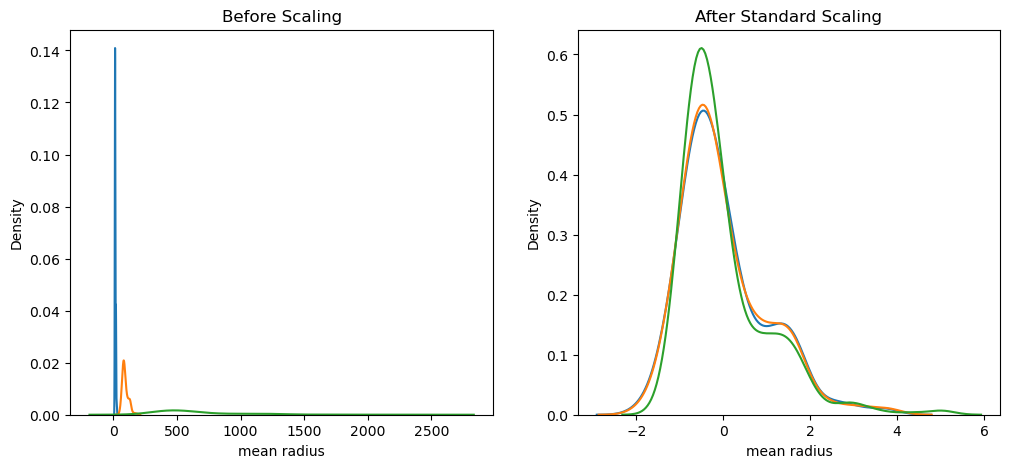

In [134]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['mean radius'], ax=ax1)
sns.kdeplot(X_train['mean perimeter'], ax=ax1)
sns.kdeplot(X_train['mean area'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['mean radius'], ax=ax2)
sns.kdeplot(X_train_scaled['mean perimeter'], ax=ax2)
sns.kdeplot(X_train_scaled['mean area'], ax=ax2)
plt.show()

> Mean Normalization

In [154]:
from sklearn.preprocessing import StandardScaler

def mean_normalize(X_train, X_test):
    """
    Perform mean normalization on both the training and testing sets.

    Parameters:
    -----------
    X_train: numpy.ndarray
        The training set features as a 2D array.

    X_test: numpy.ndarray
        The testing set features as a 2D array.

    Returns:
    --------
    X_train_norm: numpy.ndarray
        The mean-normalized training set features as a 2D array.

    X_test_norm: numpy.ndarray
        The mean-normalized testing set features as a 2D array.
    """
    scaler_mean = StandardScaler(with_mean=True, with_std=False) # set up the scaler
    scaler_minmax = RobustScaler(with_centering = False, with_scaling = True,
                                 quantile_range = (0,100))
    
    scaler_mean.fit(X_train) # fit the scaler to the train set, it will learn the parameters
    scaler_minmax.fit(X_train) #fit the scaler to the train set, it will learn the parameters
    
    X_train_norm = scaler_minmax.transform(scaler_mean.transform(X_train)) # transform train set
    X_test_norm = scaler_minmax.transform(scaler_mean.transform(X_test)) # transform test set
    return X_train_norm, X_test_norm 

X_train_norm, X_test_norm = mean_normalize(X_train, X_test)

<IPython.core.display.Javascript object>

In [155]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [144]:
round(X_train.describe(), 1) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
mean,14.2,19.2,92.3,661.9,0.1,0.1,0.1,0.0,0.2,0.1,0.4,1.2,2.9,41.4,0.0,0.0,0.0,0.0,0.0,0.0,16.4,25.5,107.7,894.2,0.1,0.3,0.3,0.1,0.3,0.1
std,3.6,4.2,24.8,366.6,0.0,0.1,0.1,0.0,0.0,0.0,0.3,0.6,2.1,49.8,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.1,34.5,597.9,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.8,7.2,0.0,0.0,0.0,0.0,0.0,0.0,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,16.0,75.3,420.4,0.1,0.1,0.0,0.0,0.2,0.1,0.2,0.8,1.6,17.8,0.0,0.0,0.0,0.0,0.0,0.0,13.1,20.9,84.1,516.4,0.1,0.1,0.1,0.1,0.2,0.1
50%,13.3,18.7,86.1,548.4,0.1,0.1,0.1,0.0,0.2,0.1,0.3,1.1,2.2,24.2,0.0,0.0,0.0,0.0,0.0,0.0,14.9,25.2,97.5,682.0,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.8,21.6,104.5,779.1,0.1,0.1,0.1,0.1,0.2,0.1,0.5,1.5,3.3,45.1,0.0,0.0,0.0,0.0,0.0,0.0,19.0,29.5,125.8,1093.2,0.1,0.3,0.4,0.2,0.3,0.1
max,28.1,33.8,188.5,2501.0,0.1,0.3,0.4,0.2,0.3,0.1,2.9,4.9,22.0,542.2,0.0,0.1,0.4,0.1,0.1,0.0,36.0,49.5,251.2,4254.0,0.2,1.1,1.1,0.3,0.7,0.2


In [158]:
round(X_train_norm.describe(), 1) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.2,0.2,0.2,0.1,0.2,0.1,0.2,0.2,0.1,0.1
min,-0.3,-0.4,-0.3,-0.2,-0.5,-0.3,-0.2,-0.2,-0.4,-0.3,-0.1,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.2,-0.2,-0.1,-0.3,-0.4,-0.3,-0.2,-0.4,-0.2,-0.2,-0.4,-0.3,-0.2
25%,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.1,-0.1
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.0,-0.1,-0.1,-0.0,-0.0,-0.0,-0.1,-0.0,-0.0
75%,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.2,0.1,0.1
max,0.7,0.6,0.7,0.8,0.5,0.7,0.8,0.8,0.6,0.7,0.9,0.8,0.9,0.9,0.8,0.8,0.9,0.8,0.8,0.9,0.7,0.6,0.7,0.8,0.6,0.8,0.8,0.6,0.7,0.8


> Scaling to Maximum and Minimum 

In [159]:
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X_train, X_test):
    """
    Scales the features in X_train and X_test to the range [0, 1] using MinMaxScaler.
    
    Parameters:
    -----------
    X_train: numpy array
        Training data features
        
    X_test: numpy array
        Test data features
        
    Returns:
    --------
    X_train_scaled: numpy array
        Scaled training data features
        
    X_test_scaled: numpy array
        Scaled test data features
    """
    # set up the scaler
    scaler = MinMaxScaler()
    
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(X_train)
    
    # transform train and test sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_min_max(X_train, X_test) 


In [162]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [165]:
np.round(X_train_scaled.describe(), 1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
mean,0.3,0.4,0.3,0.2,0.5,0.3,0.2,0.2,0.4,0.3,0.1,0.2,0.1,0.1,0.2,0.2,0.1,0.2,0.2,0.1,0.3,0.4,0.3,0.2,0.4,0.2,0.2,0.4,0.3,0.2
std,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.2,0.2,0.2,0.1,0.2,0.1,0.2,0.2,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.3,0.2,0.1,0.4,0.2,0.1,0.1,0.3,0.2,0.0,0.1,0.0,0.0,0.2,0.1,0.0,0.2,0.1,0.0,0.2,0.2,0.2,0.1,0.3,0.1,0.1,0.2,0.2,0.1
50%,0.3,0.4,0.3,0.2,0.5,0.3,0.1,0.2,0.4,0.2,0.1,0.2,0.1,0.0,0.2,0.2,0.1,0.2,0.2,0.1,0.2,0.4,0.2,0.1,0.4,0.2,0.2,0.3,0.2,0.2
75%,0.4,0.5,0.4,0.3,0.6,0.4,0.3,0.4,0.5,0.3,0.1,0.2,0.1,0.1,0.3,0.3,0.1,0.3,0.3,0.1,0.4,0.5,0.4,0.2,0.5,0.3,0.3,0.6,0.3,0.2
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Next thing

In [47]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd 

In [48]:
data = load_wine()
features = load_wine().data
target = load_wine().target

In [49]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [50]:
features.shape, target.shape

((178, 13), (178,))

In [51]:
data.feature_names
df = pd.DataFrame(features, columns=data.feature_names)
df["target"] = target

In [52]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [53]:
df["target"].unique()

array([0, 1, 2])

In [54]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')